In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import yaml
import sys

from copy import copy
from matplotlib.colors import LogNorm
#from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator

 
# setting path
sys.path.append('../')
from process_functions import averages_in_qperp_bins
from data_np_arrays import get_npy_from_ROOT


from matplotlib import style
style.use('~/dotfiles/scientific.mplstyle')
colors = ['#348ABD','#C70039','#FF5733','#FFC300','#65E88F','#40E0D0']

2024-08-22 05:08:19.687770: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 05:08:19.688168: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 05:08:19.736332: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 05:08:19.856858: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 05:08:21.520797: W tensorflow/compiler/tf2

MASK VAL =  -10


In [2]:
config_name = "perlmutter_nominal.yaml"

In [3]:
config_dir = "../configs/" #assumes cwd =  h1_asymmetry/notebooks/
CONFIG_FILE = f"{config_dir}/{config_name}"
config = yaml.safe_load(open(CONFIG_FILE))
print(f"\nLoaded {CONFIG_FILE}\n")

mc = config['mc']  # Rapgap, Django, Pythia
run_type = config['run_type']  # nominal, bootstrap, systematic
main_dir = config['main_dir']
model_dir = config['model_dir']

LABEL = config['identifier']
ID = f"{mc}_{run_type}_{LABEL}"
if config['is_test']:
    ID = ID + "_TEST"  # avoid overwrites of nominal


Loaded ../configs//perlmutter_nominal.yaml



In [4]:
print(ID)

Rapgap_nominal_Perlmutter_March13


In [5]:
#ID = "Rapgap_nominal_Perlmutter_Feb13"  #FIXME: Delete this cell when Feb14 job ends...

In [6]:
#Make Dictionaries and Binning
#N_Bins = 10
q_max = 10.0
#q_perp_bins = np.array([ 0., 1., 2., 3., 4., 5., 6., 8., 10.])
q_perp_bins = config['q_bins']
N_Bins = len(q_perp_bins)-1
#digits = np.digitize(q_perp,q_perp_bins)-1
keys=["q_perp","phi","cos1","cos2","cos3"]

### Load Processed Data

In [7]:
  # Load npy Files
cuts_h1rpgp       = np.load(f'{main_dir}/npy_files/{ID}_cuts.npy')
jet_pT_h1rpgp     = np.load(f'{main_dir}/npy_files/{ID}_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load(f'{main_dir}/npy_files/{ID}_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load(f'{main_dir}/npy_files/{ID}_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load(f'{main_dir}/npy_files/{ID}_weights.npy')[cuts_h1rpgp] #this is nn step2 * mc
mc_weights_h1rpgp = np.load(f"{main_dir}/npy_files/{ID}_mc_weights.npy")[cuts_h1rpgp]
#nn_weights_h1rpgp = np.load(f"{processed_dir}/npy_files/{ID}_nn_weights.npy")

In [8]:
# Load Django
#DjID = f"Django_nominal_{LABEL}"
DjID = "Django_nominal_Perlmutter_django_March9"
DjID = "Django_nominal_Perlmutter_Interactive"
cuts_h1djgo       = np.load(f'{main_dir}/npy_files/{DjID}_cuts.npy')
jet_pT_h1djgo     = np.load(f'{main_dir}/npy_files/{DjID}_jet_pT.npy')[cuts_h1djgo]
q_perp_h1djgo     = np.load(f'{main_dir}/npy_files/{DjID}_q_perp.npy')[cuts_h1djgo]
asymm_phi_h1djgo  = np.load(f'{main_dir}/npy_files/{DjID}_asymm_angle.npy')[cuts_h1djgo]
weights_h1djgo    = np.load(f'{main_dir}/npy_files/{DjID}_weights.npy')[cuts_h1djgo]
mc_weights_h1djgo = np.load(f"{main_dir}/npy_files/{DjID}_mc_weights.npy")[cuts_h1djgo]
nn_weights_h1djgo = np.load(f"{main_dir}/npy_files/{DjID}_nn_weights.npy")

___

## Calculate Bin Average $\cos(\phi), \cos(2\phi)$, and $\cos(3\phi)$ in Bins of $q_\perp$

### Dictionaryies and Binning

## Dictionary of Unfolded H1 Data (Main results use RAPGAP)

In [9]:
#Data unfolded USING Rapgap
h1_rpgp = {}
averages_in_qperp_bins(h1_rpgp, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp, weights_h1rpgp)

In [39]:
print(h1_rpgp.keys())

dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3'])


## MC Django + Rapgap, and unfolded Django

In [10]:
django = {}
averages_in_qperp_bins(django, q_perp_bins, q_perp_h1djgo, asymm_phi_h1djgo, mc_weights_h1djgo)

In [11]:
rapgap = {}
averages_in_qperp_bins(rapgap, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp, mc_weights_h1rpgp)

In [12]:
#Data unfolded USING Django
h1_djgo = {}
averages_in_qperp_bins(h1_djgo, q_perp_bins, q_perp_h1djgo, asymm_phi_h1djgo, weights_h1djgo)

# Uncertainties (Stat. and Sys.)

In [13]:
file = open('../bootstrap_errors.pkl', 'rb')
bootstrap_errors = pickle.load(file)
file.close()

In [14]:
bootstrap_errors['cos1']

array([0.00134086, 0.00275041, 0.0044882 , 0.00496817, 0.00546269,
       0.00645151, 0.00734063, 0.01146358])

In [15]:
file = open('../systematics.pkl', 'rb')
#file = open('../pkls/uncertainties.pkl','rb')
systematics = pickle.load(file)
file.close()

In [16]:
stat_and_sys_error = {}
for key in keys:
    stat_and_sys_error[key] = np.sqrt(bootstrap_errors[key]**2+systematics['total'][key]**2)
    #stat_and_sys_error[key] = systematics['total'][key]

print(stat_and_sys_error)
print(systematics['total'])

{'q_perp': array([0.01667101, 0.02349554, 0.00715407, 0.0061212 , 0.00757582,
       0.00819458, 0.02421913, 0.02683196]), 'phi': array([17.27842311, 16.68159868, 20.04196547, 22.83423976, 26.17793529,
       29.2300701 , 33.61485145, 48.32145945]), 'cos1': array([0.0370345 , 0.04135167, 0.01306798, 0.0211011 , 0.02581939,
       0.04688604, 0.04949581, 0.02696168]), 'cos2': array([0.00487837, 0.00487318, 0.04418263, 0.05598772, 0.06557588,
       0.05847888, 0.06850684, 0.06869195]), 'cos3': array([0.00080642, 0.00331011, 0.01940366, 0.04482064, 0.05541944,
       0.05611243, 0.04588536, 0.0554166 ])}
{'q_perp': array([0.01666681, 0.02349337, 0.00715082, 0.00592568, 0.00748858,
       0.00812322, 0.0239497 , 0.02618222]), 'phi': array([0.04722284, 0.05231896, 0.01352616, 0.02297186, 0.02716619,
       0.05214639, 0.05717284, 0.02834358]), 'cos1': array([0.03701022, 0.0412601 , 0.01227307, 0.0205079 , 0.0252349 ,
       0.04644005, 0.04894844, 0.02440325]), 'cos2': array([0.00482801, 0

In [17]:
x_low =  h1_rpgp["q_perp"] - q_perp_bins[:-1]
x_high = q_perp_bins[1:] - h1_rpgp["q_perp"]
x_errors = np.array(list(zip(x_low,x_high))).T
edges=np.stack((q_perp_bins[:-1],q_perp_bins[1:])).T

___

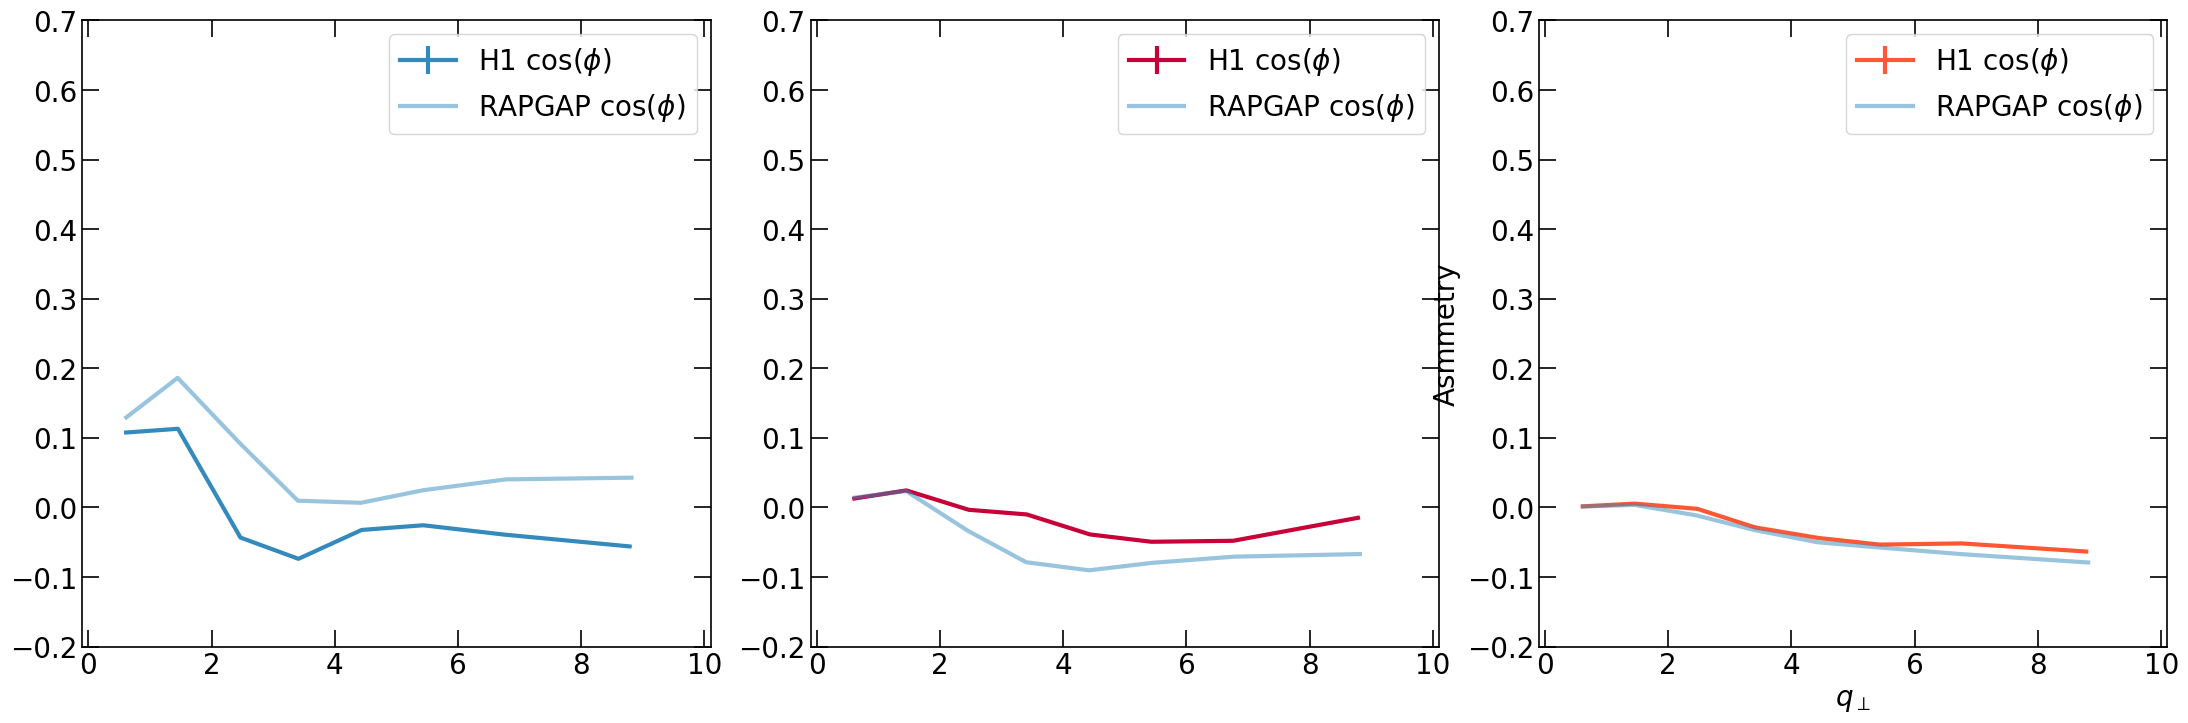

In [18]:
fig,axes = plt.subplots(1,3,figsize=(22,7))

for i,key in enumerate(["cos1","cos2","cos3"]):
    #axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],label="H1 $\cos(\phi)$",color=colors[i],linewidth=3)
    #axes[i].errorbar(rapgap["q_perp"],rapgap[key],label="RAPGAP $\cos(\phi)$",alpha=0.5,linewidth=3)
    axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=0.001,label="H1 $\cos(\phi)$",color=colors[i],linewidth=3)
    axes[i].errorbar(rapgap["q_perp"],rapgap[key],label="RAPGAP $\cos(\phi)$",alpha=0.5,linewidth=3)
    axes[i].set_xlim(-0.1,10.1)
    axes[i].set_ylim(-0.2,0.7)
    axes[i].legend(fontsize=20)

plt.tight_layout()
plt.xlabel("$q_\perp$",fontsize=20)
plt.ylabel("Asmmetry",fontsize=20)
plt.savefig("unfolded_separately.pdf")

___

## Theory https://arxiv.org/pdf/2106.05307.pdf

In [19]:


theory = {}
theory_max = 6.0
theory_bin_max = 6

for i in range(1,4):
    key = "cos%i"%(i)
    theory[key] = np.load("../theory_files/theory_cos%iphi.npy"%(i))
    theory[key] = theory[key]/i #paper plots n<cos(nphi)>
    key = key+"_x"
    theory[key] = np.load("../theory_files/theory_cos%iphi_x.npy"%(i))
    print(len(theory[key]))
    
    #theory, 5 points matching H1 <q_perp>, for ratios
    key = "for_ratio_cos%i"%(i)
    theory[key] = np.load("../theory_files/theory_for_ratio_cos%iphi.npy"%i)
    theory[key] = theory[key]/i #paper plots n<cos(nphi)>
    key = key+"_x"
    theory[key] = np.load("../theory_files/theory_for_ratio_cos%iphi_x.npy"%i)
    
    
theory = {}
for n in range(1,4):
    theory[f"cos{n}"] = np.load(f"../theory_files/theory_cos{n}phi.npy")/n
    theory[f"cos{n}_x"] = np.load(f"../theory_files/theory_cos{n}phi_x.npy")
    theory[f"polyFit_cos{n}"] = np.poly1d(np.polyfit(theory[f"cos{n}_x"], theory[f"cos{n}"], len(theory[f"cos{n}"])))
    
    theory[f"for_ratio_cos{n}"] = np.load("../theory_files/theory_for_ratio_cos%iphi.npy"%n)
    theory[f"for_ratio_cos{n}_x"] = np.load("../theory_files/theory_for_ratio_cos%iphi_x.npy"%n)
    
    
#for n in range(1,4):
#    plt.plot(theory[f"cos{n}_x"], theory[f"cos{n}"], '--',theory[f"cos{n}_x"],theory[f"polyFit_cos{n}"](theory[f"cos{n}_x"]),'-',label=f"n={n}")
#    _=plt.legend()
    

    
#plt.hist(q_perp_h1rpgp,bins=np.linspace(q_perp_bins[0],q_perp_bins[-1],len(q_perp_bins)*(n_fine_bins*2)),color="grey",alpha=0.5)
n_fine_bins = 10
qbinning = np.digitize(q_perp_h1rpgp, q_perp_bins)-1
#plt.hist(q_perp_h1rpgp[qbinning==4],bins=n_fine_bins)
#plt.hist(q_perp_h1rpgp[qbinning==5],bins=n_fine_bins)
#plt.hist(q_perp_h1rpgp[qbinning==6],bins=n_fine_bins*2)
#plt.hist(q_perp_h1rpgp,bins=np.linspace(q_perp_bins[4],q_perp_bins[7],41),color="grey",alpha=0.5)
#plt.hist(qbinning,bins=len(q_perp_bins))
n_fine_bins = 10
for n in range(1,4):
    theory[f"averages_cos{n}"] = []
    for qbin in range(theory_bin_max):
        bin_counts,bin_edges = np.histogram(q_perp_h1rpgp[qbinning==qbin],bins=n_fine_bins)
        centers = (bin_edges[1:]+bin_edges[0:-1])/2
        temp_sum = 0
        for fine_bin in range(n_fine_bins):
            #print("Bin center = ",centers[fine_bin])
            #print("Theory at Bin center = ",theory[f"polyFit_cos{n}"](centers[fine_bin]))
            #print("Bin Count = ",bin_counts[fine_bin])
            temp_sum += theory[f"polyFit_cos{n}"](centers[fine_bin])*bin_counts[fine_bin]
        #print("Avg for Larger Bin = ",temp_sum/np.sum(bin_counts))
        theory[f"averages_cos{n}"].append(temp_sum/np.sum(bin_counts))
        #print("Avg for Larger Bin = ",theory[f"averages_cos{n}"][qbin])
        #print()
        #print(h1_rpgp["q_perp"][qbin],temp_sum)
        #print(np.sum(bin_counts))
    
print(len(theory[f"averages_cos{1}"]))

47
23
24


/tmp/ipykernel_2322956/3616111923.py:25: RankWarning: Polyfit may be poorly conditioned
  theory[f"polyFit_cos{n}"] = np.poly1d(np.polyfit(theory[f"cos{n}_x"], theory[f"cos{n}"], len(theory[f"cos{n}"])))
/tmp/ipykernel_2322956/3616111923.py:25: RankWarning: Polyfit may be poorly conditioned
  theory[f"polyFit_cos{n}"] = np.poly1d(np.polyfit(theory[f"cos{n}_x"], theory[f"cos{n}"], len(theory[f"cos{n}"])))
/tmp/ipykernel_2322956/3616111923.py:25: RankWarning: Polyfit may be poorly conditioned
  theory[f"polyFit_cos{n}"] = np.poly1d(np.polyfit(theory[f"cos{n}_x"], theory[f"cos{n}"], len(theory[f"cos{n}"])))


6


In [20]:
theory.keys()

dict_keys(['cos1', 'cos1_x', 'polyFit_cos1', 'for_ratio_cos1', 'for_ratio_cos1_x', 'cos2', 'cos2_x', 'polyFit_cos2', 'for_ratio_cos2', 'for_ratio_cos2_x', 'cos3', 'cos3_x', 'polyFit_cos3', 'for_ratio_cos3', 'for_ratio_cos3_x', 'averages_cos1', 'averages_cos2', 'averages_cos3'])

## Pythia [Roli+Kyle]

In [21]:
old_pythia = {}

for i in range(1,4):
    key = "cos%i"%(i)
    old_pythia[key] = np.genfromtxt('../theory_files/Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,1]
    key = key+"_x"
    old_pythia[key] = np.genfromtxt('../theory_files/Pythia_cos%iphi_v_qT.csv'%(i), delimiter=',')[:,0]
    
old_pythia_max_q_perp = 3.0
mask1 = old_pythia["cos1_x"] < old_pythia_max_q_perp
mask2 = old_pythia["cos2_x"] < old_pythia_max_q_perp
mask3 = old_pythia["cos3_x"] < old_pythia_max_q_perp

for i in range(1,4):
    key = "cos%i"%(i)+"_x"
    mask = old_pythia[key] < old_pythia_max_q_perp
    old_pythia[key] = old_pythia[key][mask]
    key = "cos%i"%(i)
    old_pythia[key] = old_pythia[key][mask]

### PYTHIA [Vinny]

In [22]:
pythia = {}

pythia_cuts       = np.load('../theory_files/PYTHIA_defaltPS_cuts.npy')
pythia_jet_pT     = np.load('../theory_files/PYTHIA_defaltPS_jet_pT.npy')[pythia_cuts]
pythia_q_perp     = np.load('../theory_files/PYTHIA_defaltPS_q_perp.npy')[pythia_cuts]
pythia_asymm_phi  = np.load('../theory_files/PYTHIA_defaltPS_asymm_angle.npy')[pythia_cuts]
pythia_weights    = np.load('../theory_files/PYTHIA_defaltPS_weights.npy')[pythia_cuts]
pythia_mc_weights = np.load("../theory_files/PYTHIA_defaltPS_mc_weights.npy")[pythia_cuts]


averages_in_qperp_bins(pythia, q_perp_bins, pythia_q_perp, pythia_asymm_phi, pythia_weights)

In [23]:
file = open('../theory_files/PYTHIA_DefaultPS.pkl', 'rb')
pythia = pickle.load(file)
file.close()

file = open('../theory_files/PYTHIA_DIRE.pkl', 'rb')
dire = pickle.load(file)
file.close()

file = open('../theory_files/PYTHIA_VINCIA.pkl', 'rb')
vincia = pickle.load(file)
file.close()

In [24]:
pythia.keys()

dict_keys(['q_perp', 'phi', 'cos1', 'cos2', 'sin1', 'cos3'])

In [25]:
#get_npy_from_ROOT("PYTHIA_DIRE","../theory_files/pythia83_dire_1M_DIS.root")

In [26]:
#get_npy_from_ROOT("PYTHIA_VINCIA","../theory_files/pythia83_vincia_10M_118_DIS.root")

In [27]:
qbins = [0,2.0,8.0]
phi_bins = np.linspace(0,3.1416,13)

In [28]:
digits = np.digitize(pythia_q_perp,qbins)-1
N_Bins = len(qbins)-1

pythia_phi = {}
bin_centers = (phi_bins[:-1]+phi_bins[1:])/2
pythia_phi["bin_centers"] = bin_centers
for i in range(N_Bins):
          bin_mask = digits==i

          pythia_phi[str(i)],_ = np.histogram(pythia_asymm_phi[bin_mask],
                                       bins=phi_bins,
                                       density=True)

### EIC Paper https://arxiv.org/pdf/2211.01647.pdf

In [29]:
eic_x, CT18A_1 = np.loadtxt("../theory_files/eic_saturation_x004to1_n=1_CT18ANL.txt",unpack=True)
eic_x, CT18A_2 = np.loadtxt("../theory_files/eic_saturation_x004to1_n=2_CT18ANL.txt",unpack=True)
eic_x, CT18A_3 = np.loadtxt("../theory_files/eic_saturation_x004to1_n=3_CT18ANL.txt",unpack=True)

matching_q_elements = [6,14,24] #elements in the theory that match bin-centers of data (means)
n_theory_points = 4

CT18A = {}
for n in range(1,4):
    CT18A[f"cos{n}_x"],CT18A[f"cos{n}"] = np.loadtxt(f"../theory_files/eic_saturation_x004to1_n={n}_CT18ANL.txt",unpack=True)
    CT18A[f"polyFit_cos{n}"] = np.poly1d(np.polyfit(CT18A[f"cos{n}_x"], CT18A[f"cos{n}"], len(CT18A[f"cos{n}"])/2))
    

n_fine_bins = 10    
CT18A_bin_max=3
for n in range(1,4):
    CT18A[f"averages_cos{n}"] = []
    for qbin in range(CT18A_bin_max):
        bin_counts,bin_edges = np.histogram(q_perp_h1rpgp[qbinning==qbin],bins=n_fine_bins)
        centers = (bin_edges[1:]+bin_edges[0:-1])/2
        temp_sum = 0
        
        for fine_bin in range(n_fine_bins):
            temp_sum += CT18A[f"polyFit_cos{n}"](centers[fine_bin])*bin_counts[fine_bin]
            
        CT18A[f"averages_cos{n}"].append(temp_sum/np.sum(bin_counts))
    
CT18A_difference = {}
difference_temp = np.zeros(n_theory_points)
temp_x = np.zeros(n_theory_points)
for n in range(1,4):
    key = f"cos{n}"
    for i,q_el in enumerate(matching_q_elements):
        difference_temp[i+1] = CT18A[f"cos{n}"][q_el] - h1_rpgp[key][i]
        temp_x[i+1] = CT18A[f"cos{n}_x"][q_el]
    
    CT18A_difference[f"cos{n}"] = difference_temp
    CT18A_difference[f"cos{n}_x"] = temp_x
    
    
GBW = {}
for n in range(1,4):
    GBW[f"cos{n}_x"],GBW[f"cos{n}"] = np.loadtxt(f"../theory_files/eic_saturation_x004to01_n={n}_GBW.txt",unpack=True)
    GBW[f"polyFit_cos{n}"] = np.poly1d(np.polyfit(GBW[f"cos{n}_x"], GBW[f"cos{n}"], len(GBW[f"cos{n}"])/2))
    
    
for n in range(1,4):
    GBW[f"averages_cos{n}"] = []
    for qbin in range(CT18A_bin_max):
        bin_counts,bin_edges = np.histogram(q_perp_h1rpgp[qbinning==qbin],bins=n_fine_bins)
        centers = (bin_edges[1:]+bin_edges[0:-1])/2
        temp_sum = 0
        
        for fine_bin in range(n_fine_bins):
            temp_sum += GBW[f"polyFit_cos{n}"](centers[fine_bin])*bin_counts[fine_bin]
            
        GBW[f"averages_cos{n}"].append(temp_sum/np.sum(bin_counts))

GBW_difference = {}
difference_temp = np.zeros(n_theory_points)
temp_x = np.zeros(n_theory_points)
for n in range(1,4):
    key = f"cos{n}"
    for i,q_el in enumerate(matching_q_elements):
        difference_temp[i+1] = GBW[f"cos{n}"][q_el] - h1_rpgp[key][i]
        temp_x[i+1] = GBW[f"cos{n}_x"][q_el]
    
    GBW_difference[f"cos{n}"] = difference_temp
    GBW_difference[f"cos{n}_x"] = temp_x
    
    
print(GBW_difference)
print(CT18A_difference)


{'cos1': array([ 0.        , -0.00861199, -0.02705832, -0.03093383]), 'cos1_x': array([0.     , 0.608  , 1.40533, 2.402  ]), 'cos2': array([ 0.        , -0.00861199, -0.02705832, -0.03093383]), 'cos2_x': array([0.     , 0.608  , 1.40533, 2.402  ]), 'cos3': array([ 0.        , -0.00861199, -0.02705832, -0.03093383]), 'cos3_x': array([0.     , 0.608  , 1.40533, 2.402  ])}
{'cos1': array([ 0.        , -0.00463176, -0.03008592, -0.04274873]), 'cos1_x': array([0.     , 0.608  , 1.40533, 2.402  ]), 'cos2': array([ 0.        , -0.00463176, -0.03008592, -0.04274873]), 'cos2_x': array([0.     , 0.608  , 1.40533, 2.402  ]), 'cos3': array([ 0.        , -0.00463176, -0.03008592, -0.04274873]), 'cos3_x': array([0.     , 0.608  , 1.40533, 2.402  ])}


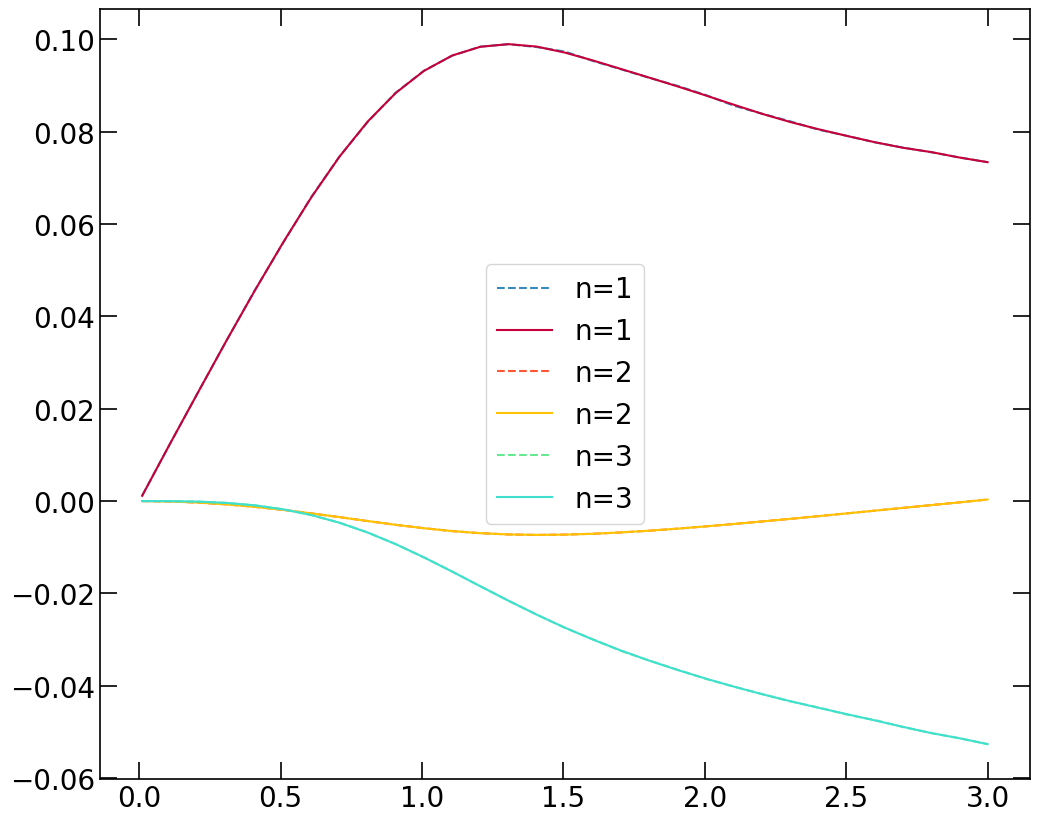

In [30]:
for n in range(1,4):
    plt.plot(CT18A[f"cos{n}_x"], CT18A[f"cos{n}"], '--',CT18A[f"cos{n}_x"],CT18A[f"polyFit_cos{n}"](CT18A[f"cos{n}_x"]),'-',label=f"n={n}")
    _=plt.legend()

___

## Overlay Everything

['HXYZ(pQCD)', 'TXZ(GBW)', 'TXZ(CT18A)', 'H1 Data', 'RAPGAP', 'DJANGOH', 'Pythia', 'Pythia + DIRE', 'Pythia + Vincia']
['H1 Data', 'RAPGAP', 'DJANGOH', 'Pythia', 'Pythia + DIRE', 'Pythia + Vincia', 'HXYZ(pQCD)', 'TXZ(GBW)', 'TXZ(CT18A)']
H1_DataRapgap+Django+Theory+Pythia+SYS+eic_saturation.pdf


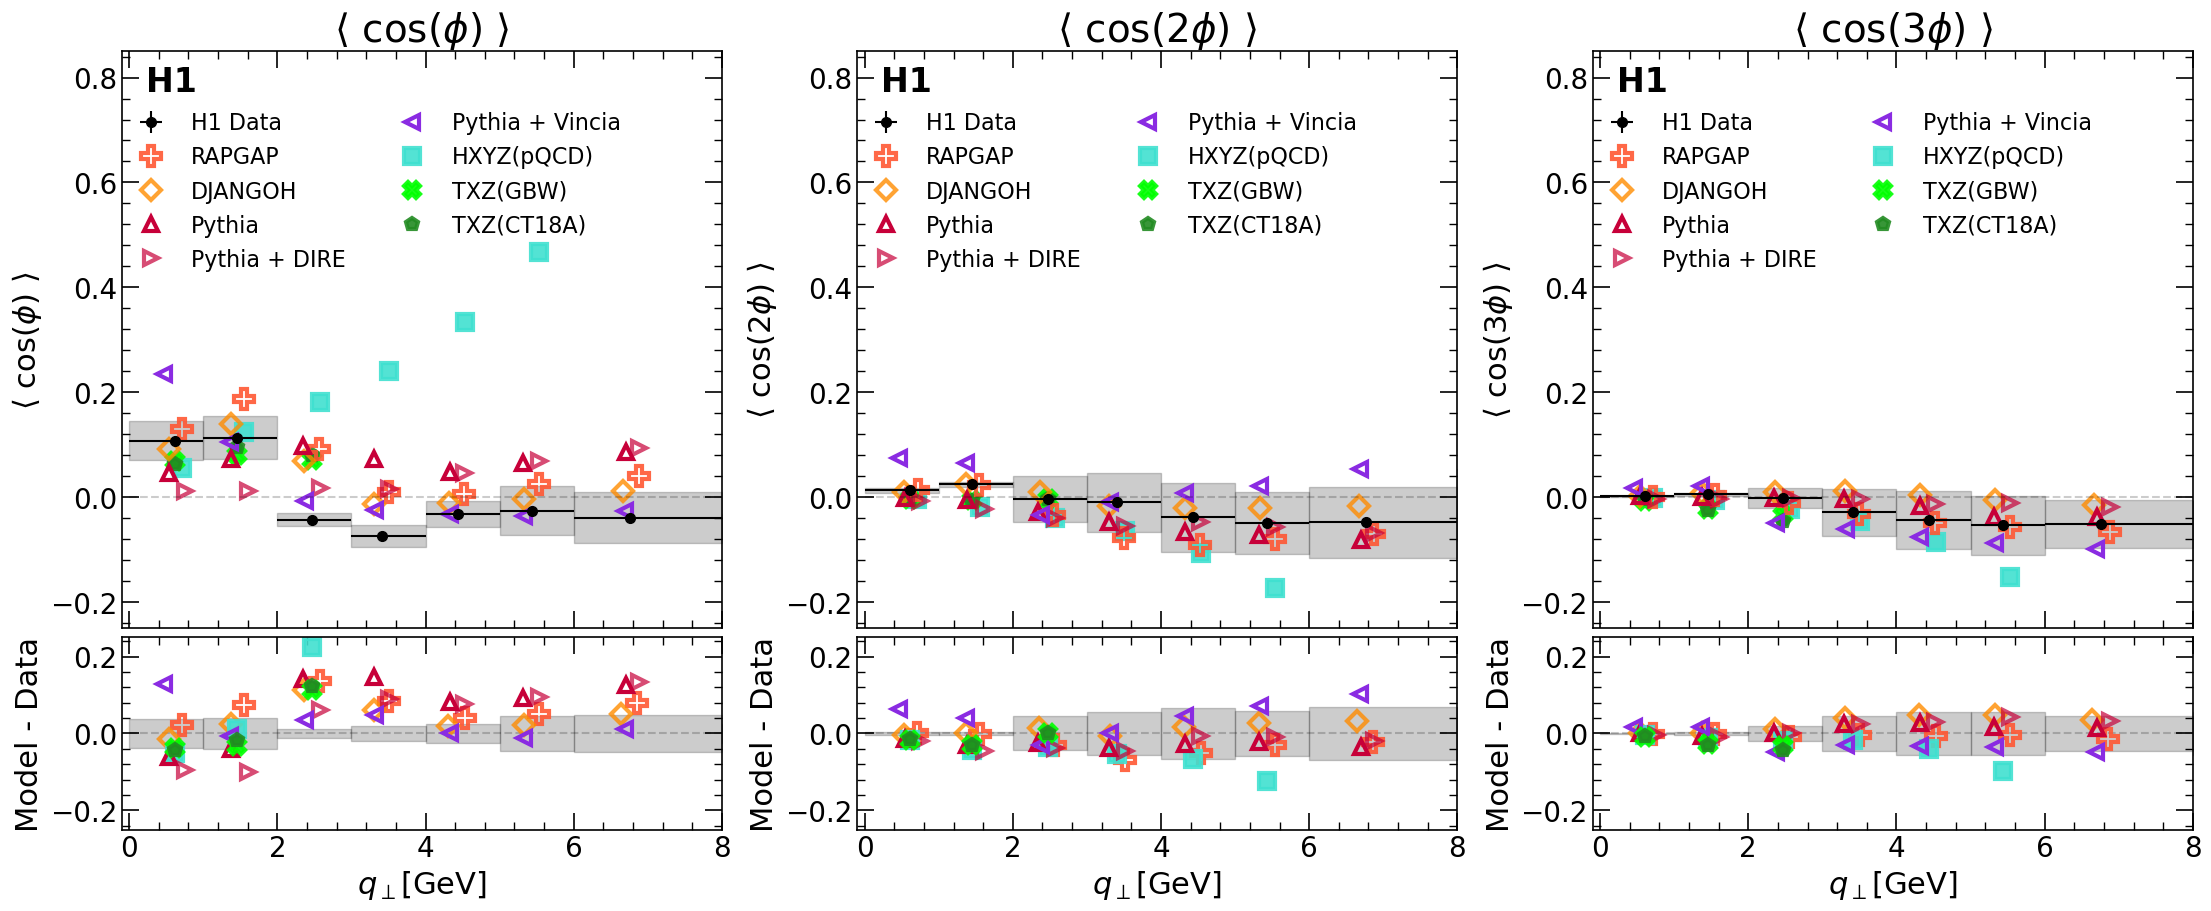

In [31]:
plot_h1rpgp = True #Default. Only one with bootstrap errors
plot_h1djgo = False #Should be false for final reporting. Is useful for dev.

plot_rapgap = True
plot_django = True

plot_pythia = True
plot_dire = True
plot_vincia = True

plot_SYS = True

plot_theory = True

plot_eic = True

plot_old_pythia = False

plot_mask = np.asarray([plot_h1rpgp,plot_h1djgo,plot_rapgap,plot_django,plot_theory,plot_pythia,plot_SYS,plot_eic])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 9), constrained_layout=True,
                         gridspec_kw={'height_ratios': [3, 1]})
axes = np.ravel(axes)

x_max = 8.0


for i in range(3):
    
    # ----- Asymmetry Plots -----
    string = r"$\langle\ \cos(%i\phi)\ \rangle$"%(i+1)
    string = string.replace("1","")
    key = "cos%i"%(i+1)
    
    axes[i].set_title(string)
    #axes[i].set_ylim(-0.4,0.5)
    axes[i].set_ylim(-0.25,0.85)
    axes[i].set_xlim(-0.1,x_max)
    axes[i].set_ylabel(string)
    axes[i].axes.set_xticklabels("")
    axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))


    #Omnifold H1 Data
    if (plot_h1rpgp):
        #axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],xerr=x_errors,
        #                 label="H1 OmniFold",ls='none',ms=7,marker=".", color='black',zorder=20) #When Bootstrap is RELATIVE
        axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key],xerr=x_errors,
                         label="H1 Data",ls='none',ms=7,marker="o", color='black',zorder=20) #ABSOLUTE Bootstrap
    if (plot_h1djgo):
        axes[i].errorbar(h1_djgo["q_perp"],h1_djgo[key],
                         label="H1 OmniFold [DJANGOH]",lw=4,ls='-',color='grey')

    #SYSTEMATICS
    if (plot_SYS):
        for xi in range(len(edges)):
            axes[i].fill_between(edges[xi],h1_rpgp[key][xi]-systematics['total'][key][xi],
                                 h1_rpgp[key][xi]+systematics['total'][key][xi], alpha=0.2,color='k',)
            
    #GENERATORS
    if (plot_rapgap):
        offset = 0.1
        axes[i].errorbar(rapgap["q_perp"]+offset,rapgap[key],label="RAPGAP",ls='none',marker="P",
                         fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    if (plot_django):
        offset = -0.1
        axes[i].errorbar(django["q_perp"]+offset,django[key],label="DJANGOH",ls='none',marker="D",
                         #fillstyle='none',markeredgewidth=3,ms=10,alpha=1.0, color=colors[3],markeredgecolor="darkorange")
                         fillstyle='none',markeredgewidth=3,ms=10,alpha=0.8, color="darkorange")
        
    if (plot_pythia):
        offset = -0.1
        axes[i].errorbar(pythia["q_perp"]+offset,pythia[key], label="Pythia",ls='none',marker="^",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=1.0)
    if (plot_dire):
        offset = 0.1
        axes[i].errorbar(dire["q_perp"]+offset,dire[key], label="Pythia + DIRE",ls='none',marker=">",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.7)
    if (plot_vincia):
        offset = -0.1
        axes[i].errorbar(vincia["q_perp"]+offset,vincia[key], label="Pythia + Vincia",ls='none',marker="<",
                         fillstyle='none',markeredgewidth=3,ms=10, color="blueviolet")
                         #fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.33)
        
    if (plot_old_pythia):
        axes[i].plot(old_pythia[key+"_x"],old_pythia[key],label="OLD Pythia",
                     linewidth=4,linestyle="dashed",color='orange')

    #THEORY
    if (plot_theory):
        n_theory_points = len(theory['averages_cos%i'%(i+1)])
        offset = 0.1
        #axes[i].plot(theory['for_ratio_cos%i_x'%(i+1)]+offset,theory['for_ratio_cos%i'%(i+1)],label="[OLD] Hatta et al.",
        #         ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.3, color="black")
        
        axes[i].plot(h1_rpgp["q_perp"][:n_theory_points]+offset,theory['averages_cos%i'%(i+1)],label="HXYZ(pQCD)",
                 ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        
        
        
    if plot_eic:
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.0
        n_eic_points = len(CT18A['averages_cos1'])
        #axes[i].plot(eic_x+offset,rcbk['cos%i'%(i+1)],label="rcBK",
        #         ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        axes[i].plot(h1_rpgp["q_perp"][:n_eic_points]+offset,GBW['averages_cos%i'%(i+1)],label="TXZ(GBW)",
                 ls='none',marker="X",markeredgewidth=3,ms=12,alpha=0.9, color=eic_colors[0])
        #axes[i].plot(eic_x[::10]+offset,CT18A['cos%i'%(i+1)][::10],label=" OLD CT18A",
        #         ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color="grey")
        axes[i].plot(h1_rpgp["q_perp"][:n_eic_points]+offset,CT18A['averages_cos%i'%(i+1)],label="TXZ(CT18A)",
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])

        #axes[i].set_ylim(-0.6,0.6)
        
   
    # ----- RATIO PLOTS -----    
    axes[i+3].set_ylabel("Model - Data")
    axes[i+3].set_xlim(-0.1,x_max)
    axes[i+3].set_ylim(-0.25,0.25)
    axes[i+3].set_xlabel(r"$q_\perp$[GeV]")
    axes[i+3].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i+3].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    axes[i+3].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
    
    if plot_h1djgo:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        axes[i+3].errorbar(h1_rpgp["q_perp"],h1_djgo[key] - h1_rpgp[key],ls='-',lw=4,color='grey')

    if plot_SYS:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        for xi in range(len(edges)):
            axes[i+3].fill_between(edges[xi],-systematics['total'][key][xi],systematics['total'][key][xi], alpha=0.2,color='k',)
    
    if plot_rapgap:
        offset = 0.1
        axes[i+3].errorbar(h1_rpgp["q_perp"]+offset,rapgap[key] - h1_rpgp[key],ls='none',marker="P",
                           fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    
    if plot_django:
        offset = -0.1
        axes[i+3].errorbar(h1_djgo["q_perp"]+offset,django[key] - h1_rpgp[key],ls='none',marker="D",
                           fillstyle='none',markeredgewidth=3,ms=10,alpha=0.8, color="darkorange")
                           #fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])

    if (plot_theory):
        n_theory_points = len(theory["for_ratio_cos%i"%(i+1)])
        #axes[i+3].errorbar(h1_rpgp["q_perp"][:n_theory_points],theory["for_ratio_cos%i"%(i+1)] - h1_rpgp[key][:n_theory_points],
        #                   ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.2, color="black")
        
        axes[i+3].errorbar(h1_rpgp["q_perp"][:n_theory_points],theory["averages_cos%i"%(i+1)] - h1_rpgp[key][:n_theory_points],
                           ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        #axes[i+3].set_ylim(-0.6,0.6)
        
    if (plot_eic):
        n_eic_points = 3
        #n_theory_points = len(rcbk["cos%i"%(i+1)])
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.0
        
        #axes[i+3].plot(GBW_difference[f"cos{n}_x"]+offset, GBW_difference[f"cos{n}"],
        axes[i+3].plot(h1_rpgp["q_perp"][:n_eic_points]+offset,GBW['averages_cos%i'%(i+1)]-h1_rpgp[key][:n_eic_points],
                 ls='none',marker="X",markeredgewidth=3,ms=12,alpha=0.9, color=eic_colors[0],zorder=21)
        
        #axes[i+3].plot(CT18A_difference[f"cos{n}_x"]+offset, CT18A_difference[f"cos{n}"],
        #         ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2],zorder=21)
        
        axes[i+3].plot(h1_rpgp["q_perp"][:n_eic_points]+offset,CT18A['averages_cos%i'%(i+1)]-h1_rpgp[key][:n_eic_points],
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2],zorder=21)
        
        
        
        #axes[i+3].set_ylim(-0.6,0.6)
        
        
    if (plot_pythia):
        offset = -0.1
        axes[i+3].errorbar(pythia["q_perp"]+offset,pythia[key] - h1_rpgp[key],ls='none',marker="^",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=1.0)
    if (plot_dire):
        offset = 0.1
        axes[i+3].errorbar(dire["q_perp"]+offset,dire[key] - h1_rpgp[key],ls='none',marker=">",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.7)
    if (plot_vincia):
        offset = -0.1
        axes[i+3].errorbar(vincia["q_perp"]+offset,vincia[key] - h1_rpgp[key],ls='none',marker="<",
                           fillstyle='none',markeredgewidth=3,ms=10, color='blueviolet')

        
        
    #Whole Plot Stuff (Legend, Text, Dashed Line at 0)
    axes[i].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
#axes[0].text(0.6,0.92,"H1 Preliminary",transform=axes[0].transAxes,fontsize=22)
axes[0].text(0.04,0.93,"H1",transform=axes[0].transAxes,fontsize=24,weight='bold')
axes[1].text(0.04,0.93,"H1",transform=axes[1].transAxes,fontsize=24,weight='bold')
axes[2].text(0.04,0.93,"H1",transform=axes[2].transAxes,fontsize=24,weight='bold')

handles, labels = axes[0].get_legend_handles_labels()
#handles[-1],handles[0] = handles[0],handles[-1]
#labels[-1],labels[0] = labels[0],labels[-1]
print(labels)
n_move = 3
if (plot_eic):
    for n in range(n_move):
        handles.append(handles.pop(0))
        labels.append(labels.pop(0))
    #handles[2],handles[0] = handles[0],handles[2]
    #labels[2],labels[0] = labels[0],labels[2]
    #handles.append(handles.pop(0))
    #handles.append(handles.pop(0))
    #handles.append(handles.pop(0))
    #labels.append(labels.pop(0))
    #labels.append(labels.pop(0))
    
print(labels)
axes[0].legend(handles,labels,fontsize=16,frameon=False,loc="upper left",bbox_to_anchor=(-0.022, 0.93),ncol=2)
axes[1].legend(handles,labels,fontsize=16,frameon=False,loc="upper left",bbox_to_anchor=(-0.022, 0.93),ncol=2)
axes[2].legend(handles,labels,fontsize=16,frameon=False,loc="upper left",bbox_to_anchor=(-0.022, 0.93),ncol=2)

strings = np.asarray(["H1_Data","Unfolded_fromDjango","Rapgap","Django","Theory","Pythia","SYS","eic_saturation"])
strings = strings[plot_mask]
string = ""
for i,datum in enumerate(strings):
    string += datum
    if i > 0: string +="+"
string = string[:-1]

plt.savefig(string+".pdf")
print(string + ".pdf")

## Table of Results

In [32]:
n_round = 3
sys_keys = ['model', 'sys0', 'sys1', 'sys5', 'sys7', 'sys11', 'QED']
obs_name = ['$\langle \cos(\phi) \rangle$', '$\langle \cos(2\phi) \rangle$', '$\langle \cos(3\phi) \rangle$']

print('\hline')

for o, obs in enumerate(['cos1','cos2','cos3']):
    header = ['$q_\perp$ [GeV]',obs,'Stat.','Tot.', 'Model', 'HFS(jet)', 'HFS(other)', 'HFS($\phi$)', 'Lepton(E)', 'Lepton($\phi$)', 'QED']
    print(' & '.join(header),'\\\\')
    print('\hline')
    for q in range(len(q_perp_bins)-2):
        data_s = []
        data_s.append(f'$[{q_perp_bins[q]}, {q_perp_bins[q+1]}]$')
        data_s.append(f'{np.round(h1_rpgp[obs][q],n_round)}')
        data_s.append(f'{np.round(bootstrap_errors[obs][q],n_round)}')
        data_s.append(f'{np.round(stat_and_sys_error[obs][q],n_round)}')
        for sys_key in sys_keys:
            data_s.append(str(np.round(systematics[sys_key][obs][q],n_round)))
        print(' & '.join(data_s),'\\\\')
    print('\hline')

\hline
$q_\perp$ [GeV] & cos1 & Stat. & Tot. & Model & HFS(jet) & HFS(other) & HFS($\phi$) & Lepton(E) & Lepton($\phi$) & QED \\
\hline
$[0.0, 1.0]$ & 0.108 & 0.001 & 0.037 & 0.037 & 0.003 & 0.001 & 0.001 & 0.001 & 0.001 & 0.0 \\
$[1.0, 2.0]$ & 0.113 & 0.003 & 0.041 & 0.041 & 0.004 & 0.001 & 0.001 & 0.0 & 0.003 & 0.003 \\
$[2.0, 3.0]$ & -0.043 & 0.004 & 0.013 & 0.01 & 0.005 & 0.003 & 0.001 & 0.001 & 0.003 & 0.0 \\
$[3.0, 4.0]$ & -0.074 & 0.005 & 0.021 & 0.009 & 0.01 & 0.005 & 0.001 & 0.003 & 0.002 & 0.014 \\
$[4.0, 5.0]$ & -0.032 & 0.005 & 0.026 & 0.017 & 0.015 & 0.008 & 0.004 & 0.007 & 0.002 & 0.001 \\
$[5.0, 6.0]$ & -0.026 & 0.006 & 0.047 & 0.039 & 0.014 & 0.012 & 0.009 & 0.009 & 0.002 & 0.009 \\
$[6.0, 8.0]$ & -0.039 & 0.007 & 0.049 & 0.039 & 0.013 & 0.012 & 0.013 & 0.009 & 0.002 & 0.017 \\
\hline
$q_\perp$ [GeV] & cos2 & Stat. & Tot. & Model & HFS(jet) & HFS(other) & HFS($\phi$) & Lepton(E) & Lepton($\phi$) & QED \\
\hline
$[0.0, 1.0]$ & 0.013 & 0.001 & 0.005 & 0.004 & 0.001 & 0.00

## Covariance Matrix and Numerical Result

In [48]:
cov_mat = np.load("../npy_files/covariance_matrix_cos1.npy")
print(cov_mat)
cov_mat = np.load("../npy_files/covariance_matrix_cos2.npy")
print(cov_mat)

cor_mat = np.load("../npy_files/correlation_matrix.npy")

[[ 1.80526379e-06  3.29058019e-06  4.73579128e-06  5.11677630e-06
   4.07595924e-06  3.70144686e-06  2.92852415e-06  2.72082273e-06]
 [ 3.29058019e-06  7.60324661e-06  1.20547986e-05  1.17976186e-05
   6.30858212e-06  3.77905551e-06  8.09673988e-07 -1.77849895e-06]
 [ 4.73579128e-06  1.20547986e-05  2.02803473e-05  1.96037978e-05
   8.72566796e-06  3.73696231e-06 -1.43486518e-06 -6.68593279e-06]
 [ 5.11677630e-06  1.17976186e-05  1.96037978e-05  2.45105153e-05
   1.70145540e-05  1.09087668e-05  6.92833241e-06  5.08387793e-06]
 [ 4.07595924e-06  6.30858212e-06  8.72566796e-06  1.70145540e-05
   2.95750356e-05  3.05055737e-05  2.68407482e-05  2.37873953e-05]
 [ 3.70144686e-06  3.77905551e-06  3.73696231e-06  1.09087668e-05
   3.05055737e-05  4.18833170e-05  4.15345845e-05  3.46817593e-05]
 [ 2.92852415e-06  8.09673988e-07 -1.43486518e-06  6.92833241e-06
   2.68407482e-05  4.15345845e-05  5.44269912e-05  6.31477394e-05]
 [ 2.72082273e-06 -1.77849895e-06 -6.68593279e-06  5.08387793e-06
   

In [34]:
print(np.shape(cov_mat))
print(cov_mat[0])

(8, 8)
[4.93717739e-07 8.68068944e-07 1.32837378e-06 1.48787647e-06
 1.85679427e-06 2.43044850e-06 2.72883960e-06 2.49739029e-06]


In [40]:
covariance_matrices = {}
for key in ['cos1', 'cos2', 'cos3']:
    cov_mat = np.load(f"../npy_files/covariance_matrix_{key}.npy")
    covariance_matrices[key] = cov_mat

In [41]:
print(covariance_matrices['cos1'])
print(covariance_matrices['cos3'])

[[ 1.80526379e-06  3.29058019e-06  4.73579128e-06  5.11677630e-06
   4.07595924e-06  3.70144686e-06  2.92852415e-06  2.72082273e-06]
 [ 3.29058019e-06  7.60324661e-06  1.20547986e-05  1.17976186e-05
   6.30858212e-06  3.77905551e-06  8.09673988e-07 -1.77849895e-06]
 [ 4.73579128e-06  1.20547986e-05  2.02803473e-05  1.96037978e-05
   8.72566796e-06  3.73696231e-06 -1.43486518e-06 -6.68593279e-06]
 [ 5.11677630e-06  1.17976186e-05  1.96037978e-05  2.45105153e-05
   1.70145540e-05  1.09087668e-05  6.92833241e-06  5.08387793e-06]
 [ 4.07595924e-06  6.30858212e-06  8.72566796e-06  1.70145540e-05
   2.95750356e-05  3.05055737e-05  2.68407482e-05  2.37873953e-05]
 [ 3.70144686e-06  3.77905551e-06  3.73696231e-06  1.09087668e-05
   3.05055737e-05  4.18833170e-05  4.15345845e-05  3.46817593e-05]
 [ 2.92852415e-06  8.09673988e-07 -1.43486518e-06  6.92833241e-06
   2.68407482e-05  4.15345845e-05  5.44269912e-05  6.31477394e-05]
 [ 2.72082273e-06 -1.77849895e-06 -6.68593279e-06  5.08387793e-06
   

In [73]:
import numpy as np
from scipy.stats import chi2

for key in ['cos1', 'cos2', 'cos3']:
    
    data = h1_rpgp[key]
    sigma_sys = systematics['total'][key]
    sigma_stat = covariance_matrices[key]
    #print("Covarience Matrix, first and last")
    #print(sigma_stat[0][0],sigma_stat[-1][-1])
    #print("Data:")
    #print(data)
    #print("Sys:")
    #print(sigma_sys)
    

    full_cov_matrix = np.outer(sigma_sys, sigma_sys) + sigma_stat
    full_cov_matrix = np.outer(sigma_sys, sigma_sys) + np.diag(bootstrap_errors[key])

    # Calculate the pseudo-inverse of the new covariance matrix
    #inverse_cov = np.linalg.inv(full_cov_matrix)
    inverse_cov = np.linalg.inv(full_cov_matrix)

    # Calculate new chi^2 using the pseudo-inverse
    chi2_val = np.dot(data.T, np.dot(inverse_cov, data))

    # Calculate the new p-value
    n=len(data)-1
    p_val = 1 - chi2.cdf(chi2_val, df=n)

    print(f"{key}: chi^2 = {chi2_val}, p-val = {p_val}")

cos1: chi^2 = 12.113911491923826, p-val = 0.0968745097640038
cos2: chi^2 = 1.2657186029820564, p-val = 0.9893342021298229
cos3: chi^2 = 1.291469512418703, p-val = 0.988666155198833


In [38]:
#key = 'cos3'
#data = h1_rpgp[key]
#stats_error = bootstrap_errors[key]
#sys_error = systematics['total'][key]

import scipy.stats as stats
import numpy as np

#cos1
data = np.array([0.10770931, 0.11304753, -0.0433222, -0.07385767, -0.03234928, -0.02560711, -0.03912516, -0.05600509])
sys_error = np.array([0.03082293, 0.04525894, 0.02897055, 0.03647626, 0.03024107, 0.03969298, 0.04999147, 0.0279629])
#stats_error = np.array([0.00134086, 0.00275041, 0.0044882, 0.00496817, 0.00546269, 0.00645151, 0.00734063, 0.01146358])


#cos3
data = np.array([ 0.0016032, 0.00550152, -0.00196917, -0.02873414, -0.04385505, -0.05340689, -0.05171514, -0.06336255])
sys_error = np.array([0.00124032, 0.00463149, 0.02415974, 0.0506633,  0.05662881, 0.05542966, 0.06067581, 0.06277075])
#stats_error = np.array([0.00036986, 0.00046804, 0.00075999, 0.00090727, 0.00126215, 0.00192496, 0.00227879, 0.00321573])


# Statistical covariance matrix (diagonal)
stat_cov = np.diag(stats_error**2)

# Systematic covariance matrix (fully correlated)
sys_cov = np.outer(sys_error, sys_error)

# Total covariance matrix
total_cov = sys_cov

# Invert the total covariance matrix
inv_total_cov = np.linalg.inv(total_cov)

# Calculate chi-square
chi_square = np.dot(data, np.dot(inv_total_cov, data))

# Degrees of freedom
DoF = len(data) - 2

# Calculate reduced chi-square
chi_square_red = chi_square / DoF

# Calculate p-value
p_value = stats.chi2.sf(chi_square, DoF)

print("p-val: ",p_value)
print("chi^2: ", chi_square)
print("chi^2_red: ", chi_square_red)

NameError: name 'stats_error' is not defined

In [ ]:
import numpy as np
from scipy.stats import chi2

boot_cov_matrix = []
for row in cov_mat[:-1]:
    temp = []
    for col in range(8):
        temp.append(col)
    boot_cov_matrix.append(temp)
    

# cos1
data = np.array([0.10770931, 0.11304753, -0.0433222, -0.07385767, -0.03234928, -0.02560711, -0.03912516, -0.05600509])
sys_error = np.array([0.03082293, 0.04525894, 0.02897055, 0.03647626, 0.03024107, 0.03969298, 0.04999147, 0.0279629])

#cos3
data = np.array([ 0.0016032, 0.00550152, -0.00196917, -0.02873414, -0.04385505, -0.05340689, -0.05171514, -0.06336255])
#stats_error = np.array([0.00036986, 0.00046804, 0.00075999, 0.00090727, 0.00126215, 0.00192496, 0.00227879, 0.00321573])
sys_error = np.array([0.00124032, 0.00463149, 0.02415974, 0.0506633,  0.05662881, 0.05542966, 0.06067581, 0.06277075])

# Number of data points
n = len(data)

# Construct the covariance matrix
cov_matrix = np.outer(sys_error, sys_error)

# Calculate the inverse of the covariance matrix
#cov_matrix_inv = np.linalg.inv(cov_matrix)

# Calculate the pseudo-inverse of the new covariance matrix
new_cov_matrix_pinv = np.linalg.pinv(cov_matrix)

# Calculate new chi^2 using the pseudo-inverse
new_chi2_value_pinv = np.dot(data.T, np.dot(new_cov_matrix_pinv, data))

# Calculate the new p-value
new_p_value_pinv = 1 - chi2.cdf(new_chi2_value_pinv, df=n)

new_chi2_value_pinv, new_p_value_pinv

# Calculate chi^2
#chi2_value = np.dot(data.T, np.dot(cov_matrix_inv, data))

# Calculate the p-value
#p_value = 1 - chi2.cdf(chi2_value, df=n)

#hi2_value, p_value

In [ ]:
import numpy as np
from scipy.stats import chi2

# Provided updated data
data = np.array([0.10770931, 0.11304753, -0.0433222, -0.07385767, -0.03234928, -0.02560711, -0.03912516, -0.05600509])

# Provided covariance matrix
cov_matrix = np.array([
    [4.90810100e-06, 3.14402192e-06, 1.40365981e-06, -3.60257259e-07, -1.62467795e-06, -2.11216336e-06, -2.07015942e-06, -1.85910212e-06, -1.42942262e-06],
    [3.14402192e-06, 2.55917488e-06, 1.44119781e-06, 1.56382300e-07, -9.35030961e-07, -1.47029545e-06, -1.60736579e-06, -1.66426887e-06, -1.62381584e-06],
    [1.40365981e-06, 1.44119781e-06, 1.04313087e-06, 3.77434067e-07, -3.04244881e-07, -7.17284567e-07, -9.10267882e-07, -1.08563736e-06, -1.24798786e-06],
    [-3.60257259e-07, 1.56382300e-07, 3.77434067e-07, 4.23468155e-07, 2.79093583e-07, 8.69590218e-08, -9.94072990e-08, -3.08997848e-07, -5.54674720e-07],
    [-1.62467795e-06, -9.35030961e-07, -3.04244881e-07, 2.79093583e-07, 6.36817099e-07, 6.99354289e-07, 5.98405722e-07, 4.38431594e-07, 2.11851511e-07],
    [-2.11216336e-06, -1.47029545e-06, -7.17284567e-07, 8.69590218e-08, 6.99354289e-07, 9.53173543e-07, 9.50862740e-07, 8.80812469e-07, 7.28581325e-07],
    [-2.07015942e-06, -1.60736579e-06, -9.10267882e-07, -9.94072990e-08, 5.98405722e-07, 9.50862740e-07, 1.05005390e-06, 1.07222191e-06, 1.01565611e-06],
    [-1.85910212e-06, -1.66426887e-06, -1.08563736e-06, -3.08997848e-07, 4.38431594e-07, 8.80812469e-07, 1.07222191e-06, 1.22068374e-06, 1.30585648e-06],
    [-1.42942262e-06, -1.62381584e-06, -1.24798786e-06, -5.54674720e-07, 2.11851511e-07, 7.28581325e-07, 1.01565611e-06, 1.30585648e-06, 1.59395561e-06]
])

# Provided systematic uncertainties
sys_uncertainties = np.array([0.03082293, 0.04525894, 0.02897055, 0.03647626, 0.03024107, 0.03969298, 0.04999147, 0.0279629])

# Step 1: Include systematic uncertainties
#sys_var_matrix = np.diag(sys_uncertainties**2)
sys_var_matrix = np.outer(sys_error, sys_error)
adjusted_cov_matrix = cov_matrix[:len(sys_uncertainties), :len(sys_uncertainties)] + sys_var_matrix

# Step 2: Construct the test statistic
n = len(data)
trace_adjusted_cov = np.trace(adjusted_cov_matrix)
test_statistic = n * trace_adjusted_cov

# Step 3: Degrees of freedom
df = len(sys_uncertainties)  # Since we are only considering the variances (diagonal elements)

# Step 4: Compare to chi-squared distribution
p_value = 1 - chi2.cdf(test_statistic, df)

print(f'Test Statistic: {test_statistic}')
print(f'Degrees of Freedom: {df}')
print(f'P-Value: {p_value}')

### P-value consistency with zero

In [ ]:
boot_cov_matrix = []
for row in cov_mat[:-1]:
    temp = []
    for col in range(8):
        temp.append(col)
    boot_cov_matrix.append(temp)

for key in ['cos1', 'cos2', 'cos3']:
    
    y = h1_rpgp[key]
    sigma_stat = systematics['total'][key]
    sigma_sys  = bootstrap_errors[key]
    
    # Combine the errors
    sigma = np.sqrt(sigma_stat**2 + sigma_sys**2)
    
    # Calculate chi-square
    chi2_value = np.sum((y / sigma)**2)
    
    # Degrees of freedom
    dof = len(y)  # since we compare to y=0 and no parameters are estimated
    
    # Calculate p-value
    p_value = chi2.sf(chi2_value, dof)

    print(f"{key}: chi^2 = {chi2_value}, p-val = {p_value}")

In [ ]:
cov_mat = np.load("../npy_files/covariance_matrix.npy")

for key in ['cos1', 'cos2', 'cos3']:
    
    data = h1_rpgp[key]
    sigma_sys = systematics['total'][key]
    sigma_stat  = bootstrap_errors[key]
    n = len(data)
    C = np.zeros((n, n))

    for i in range(n):
        C[i] = cov_mat[i,:n]
        for j in range(n):
            if i!=j:
                C[i, j] = sigma_sys[i] * sigma_sys[j]
            if i==j:
                C[i,j] = sigma_stat[i]**2

    print(C)
    C_inv = np.linalg.inv(C)

    # Calculate chi-square
    chi2_value = np.dot(data.T, np.dot(C_inv, data))
    DoF = len(data) - 2
    p_value = stats.chi2.sf(chi2_value, DoF)

    print(key)
    print("Chi^2 value:", chi2_value)
    print("p-val:", p_value)


In [ ]:
plot_h1rpgp = True #Default. Only one with bootstrap errors
plot_h1djgo = True #Should be false for final reporting. Is useful for dev.

plot_rapgap = False
plot_django = False

plot_pythia = False
plot_dire = False
plot_vincia = False
plot_old_pythia = False

plot_SYS = False

plot_theory = False

plot_eic = False

plot_mask = np.asarray([plot_h1rpgp,plot_h1djgo,plot_rapgap,plot_django,plot_theory,plot_pythia,plot_SYS,plot_eic])
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(22, 9), constrained_layout=True,
                         gridspec_kw={'height_ratios': [3, 1]})
axes = np.ravel(axes)

x_max = 8.0


for i in range(3):
    
    # ----- Asymmetry Plots -----
    string = r"$\langle\ \cos(%i\phi)\ \rangle$"%(i+1)
    string = string.replace("1","")
    key = "cos%i"%(i+1)
    
    axes[i].set_title(string)
    #axes[i].set_ylim(-0.4,0.5)
    axes[i].set_ylim(-0.25,0.75)
    axes[i].set_xlim(-0.1,x_max)
    axes[i].set_ylabel(string)
    axes[i].axes.set_xticklabels("")
    axes[i].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i].xaxis.set_minor_locator(AutoMinorLocator(5))


    #Omnifold H1 Data
    if (plot_h1rpgp):
        #axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key]*h1_rpgp[key],xerr=x_errors,
        #                 label="H1 OmniFold",ls='none',ms=7,marker=".", color='black',zorder=20) #When Bootstrap is RELATIVE
        axes[i].errorbar(h1_rpgp["q_perp"],h1_rpgp[key],yerr=bootstrap_errors[key],xerr=x_errors,
                         label="H1 Data (MultiFold RAPGAP)",ls='none',ms=7,marker=".", color='black',zorder=20) #ABSOLUTE Bootstrap
    if (plot_h1djgo):
        #axes[i].errorbar(-10,100,
        #                label="Bias Study (MultiFold DJANGOH)",lw=4,ls='-',color='forestgreen',alpha=0.8)
        #for xi in range(len(edges)):
        #    lower = h1_djgo[key][xi]-0.004
        #    upper = h1_djgo[key][xi]+0.004
        #    axes[i].fill_between(edges[xi],lower,upper,alpha=0.8,color='forestgreen')

        axes[i].errorbar(h1_djgo["q_perp"], h1_djgo[key], label="Bias Study (Djangoh Prior)", xerr=x_errors, 
                         ms=7, marker=".", color='forestgreen', alpha=0.8, ls='none')

    #SYSTEMATICS
    if (plot_SYS):
        for xi in range(len(edges)):
            axes[i].fill_between(edges[xi],h1_rpgp[key][xi]-systematics['total'][key][xi],
                                 h1_rpgp[key][xi]+systematics['total'][key][xi], alpha=0.2,color='k',)
            
    #GENERATORS
    if (plot_rapgap):
        offset = 0.1
        axes[i].errorbar(rapgap["q_perp"]+offset,rapgap[key],label="RAPGAP",ls='none',marker="P",
                         fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    if (plot_django):
        offset = -0.1
        axes[i].errorbar(django["q_perp"]+offset,django[key],label="DJANGOH",ls='none',marker="D",
                         fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])
        
    if (plot_pythia):
        offset = -0.1
        axes[i].errorbar(pythia["q_perp"]+offset,pythia[key], label="Pythia",ls='none',marker="^",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.95)
    if (plot_dire):
        offset = 0.1
        axes[i].errorbar(dire["q_perp"]+offset,dire[key], label="Pythia + DIRE",ls='none',marker=">",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.6)
    if (plot_vincia):
        offset = -0.1
        axes[i].errorbar(vincia["q_perp"]+offset,vincia[key], label="Pythia + Vincia",ls='none',marker="<",
                         fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.33)
        
    if (plot_old_pythia):
        axes[i].plot(old_pythia[key+"_x"],old_pythia[key],label="OLD Pythia",
                     linewidth=4,linestyle="dashed",color='orange')

    #THEORY
    if (plot_theory):
        offset = 0.1
        axes[i].plot(theory['for_ratio_cos%i_x'%(i+1)]+offset,theory['for_ratio_cos%i'%(i+1)],label="Hatta, et al.",
                 ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        axes[i].set_ylim(-0.25,0.6)
        
        
    if plot_eic:
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.1
        axes[i].plot(eic_x+offset,rcbk['cos%i'%(i+1)],label="rcBK",
                 ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        axes[i].plot(eic_x+offset,GBW['cos%i'%(i+1)],label="GBW",
                 ls='none',marker="h",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[1])
        axes[i].plot(eic_x+offset,CT18A['cos%i'%(i+1)],label="CT18A",
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])
        axes[i].set_ylim(-0.6,0.6)
        
   
    #Whole Plot Stuff (Legend, Text, Dashed Line at 0)
    axes[i].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)    
    axes[i].legend(fontsize=19,frameon=False,bbox_to_anchor=(0.91, 0.92))
    axes[i].text(0.04,0.92,"H1 Preliminary",transform=axes[i].transAxes,fontsize=24)


    # ----- RATIO PLOTS -----    
    axes[i+3].set_ylabel("Bias Study")
    axes[i+3].set_xlim(-0.1,x_max)
    axes[i+3].set_ylim(-0.25,0.25)
    axes[i+3].set_xlabel(r"$q_\perp$[GeV]")
    axes[i+3].yaxis.set_minor_locator(AutoMinorLocator(5))
    axes[i+3].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    axes[i+3].errorbar(np.linspace(0,max(h1_rpgp["q_perp"]),len(h1_rpgp[key])),h1_rpgp[key] - h1_rpgp[key],ls='--',ms=7, color="black",alpha=0.2)
    
    if plot_h1djgo:
        model_difference = h1_rpgp[key]-h1_djgo[key]
        #axes[i+3].errorbar(h1_rpgp["q_perp"],h1_djgo[key] - h1_rpgp[key],ls='-',lw=4,color='forestgreen')
        #for xi in range(len(edges)):
        #    lower = h1_djgo[key][xi]-h1_rpgp[key][xi]-0.007
        #    upper = h1_djgo[key][xi]-h1_rpgp[key][xi]+0.007
        #    axes[i+3].fill_between(edges[xi], lower, upper, alpha=0.8,color='forestgreen')

        axes[i+3].errorbar(h1_djgo["q_perp"], model_difference, label="Bias Study (Djangoh Prior)", xerr=x_errors, 
                         ms=7, marker=".", color='forestgreen', alpha=0.8, ls='none')



    if plot_SYS:
        model_difference = np.abs(h1_rpgp[key]-h1_djgo[key])
        for xi in range(len(edges)):
            axes[i+3].fill_between(edges[xi],-systematics['total'][key][xi],systematics['total'][key][xi], alpha=0.2,color='k',)
    
    if plot_rapgap:
        offset = 0.1
        axes[i+3].errorbar(h1_rpgp["q_perp"]+offset,rapgap[key] - h1_rpgp[key],ls='none',marker="P",
                           fillstyle='none',markeredgewidth=3,ms=14,alpha=0.9, color=colors[2])
    
    if plot_django:
        offset = -0.1
        axes[i+3].errorbar(h1_djgo["q_perp"]+offset,django[key] - h1_rpgp[key],ls='none',marker="D",
                           fillstyle='none',markeredgewidth=3,ms=10,alpha=0.9, color=colors[3])

    if (plot_theory):
        n_theory_points = len(theory["for_ratio_cos%i"%(i+1)])
        axes[i+3].errorbar(h1_rpgp["q_perp"][:n_theory_points],theory["for_ratio_cos%i"%(i+1)] - h1_rpgp[key][:n_theory_points],
                           ls='none',marker="s",markeredgewidth=3,ms=11,alpha=0.9, color=colors[5])
        axes[i+3].set_ylim(-0.6,0.6)
        
    if (plot_eic):
        n_theory_points = len(rcbk["cos%i"%(i+1)])
        eic_colors = ["lime","limegreen","forestgreen"]
        offset = -0.1
        
        axes[i+3].plot(eic_x[1:]+offset,rcbk['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
                 ls='none',marker="o",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[0])
        
        axes[i+3].plot(eic_x[1:]+offset, GBW['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
                 ls='none',marker="h",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[1])
        
        axes[i+3].plot(eic_x[1:]+offset, CT18A['cos%i'%(i+1)][1:] - h1_rpgp[key][:n_theory_points-1],
                 ls='none',marker="p",markeredgewidth=3,ms=9,alpha=0.9, color=eic_colors[2])
        
        axes[i+3].set_ylim(-0.6,0.6)
        
        
    if (plot_pythia):
        offset = -0.1
        axes[i+3].errorbar(pythia["q_perp"]+offset,pythia[key] - h1_rpgp[key],ls='none',marker="^",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.95)
    if (plot_dire):
        offset = 0.1
        axes[i+3].errorbar(dire["q_perp"]+offset,dire[key] - h1_rpgp[key],ls='none',marker=">",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.6)
    if (plot_vincia):
        offset = -0.1
        axes[i+3].errorbar(vincia["q_perp"]+offset,vincia[key] - h1_rpgp[key],ls='none',marker="<",
                           fillstyle='none',markeredgewidth=3,ms=10, color=colors[1],alpha=0.33)



strings = np.asarray(["H1_Data","Unfolded_fromDjango","Rapgap","Django","Theory","Pythia","model_SYS","eic_saturation"])
strings = strings[plot_mask]
string = ""
for i,datum in enumerate(strings):
    string += datum
    if i > 0: string +="+"
string = string[:-1]

plt.savefig("bias_study_asymmetry.pdf")

### 2D Asymmetry Histograms

In [ ]:
N_Bins = 50
xbins = np.linspace(-0.01,10.01,N_Bins)
ybins = np.linspace(-1.02,1.02,N_Bins)
cmap = copy(plt.cm.plasma)

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 5), constrained_layout=True)

q_perp = h1_rpgp["q_perp"]
asymm_phi = h1
h0, xedges0, yedges0 = np.histogram2d(q_perp, (asymm_phi), bins=(np.linspace(0,10,N_Bins),np.linspace(0,3,N_Bins)), weights=weights)
h1, xedges1, yedges1 = np.histogram2d(q_perp, np.cos(asymm_phi),bins=(xbins,ybins), weights=weights)
h2, xedges2, yedges2 = np.histogram2d(q_perp, np.cos(2*asymm_phi), bins=(xbins,ybins), weights=weights)
h3, xedges3, yedges3 = np.histogram2d(q_perp, np.cos(3*asymm_phi), bins=(xbins,ybins), weights=weights)

pcm0 = axes[0].pcolormesh(xedges0, yedges0, h0.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm1 = axes[1].pcolormesh(xedges1, yedges1, h1.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm2 = axes[2].pcolormesh(xedges2, yedges2, h2.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e5), rasterized=True)
pcm3 = axes[3].pcolormesh(xedges3, yedges3, h3.T, cmap=cmap, norm=LogNorm(vmin=1.0e0,vmax=1.0e4), rasterized=True)
axes[0].set_ylabel("$\phi$",fontsize=22)
axes[1].set_ylabel("$\cos(\phi)$",fontsize=22)
axes[2].set_ylabel("$\cos(2\phi)$",fontsize=22)
axes[3].set_ylabel("$\cos(3\phi)$",fontsize=22)
#cb0=axes[0].colorbar(pcm,ax)

fig.colorbar(pcm0, ax=axes[0], pad= -0.049)
fig.colorbar(pcm1, ax=axes[1], pad= -0.01)
fig.colorbar(pcm2, ax=axes[2], pad= -0.01)
cb=fig.colorbar(pcm3, ax=axes[3], pad= -0.01)

plt.xlabel("$q_\perp$",fontsize=22)
cb.set_label("Counts",fontsize=22)
plt.savefig("2D_asymmetries.png")